#### Day 8: Complexity, Recursion, Sorting and Searching

_Will you use recursion for your research in political science? -- Probably not._

If you are going to the industry, these become really important for code interviews. 

Here are more sources on that: 
- https://leetcode.com/
- https://open.kattis.com/problems



#### Part 1. Recursion

Recursion simply refers to when a function calls itself. 

You need to know
  - the base case
  - when to call the function
  - when to stop


The typical example is factorial: 
(n)! = n * (n-1)! = n * (n-1) * (n-2)! = n * (n-1) * (n-2) ... * 2 * 1


A physical world example would be to place two parallel mirrors facing each other. Any object in between them would be reflected recursively. 


Why recursion? Why not recursion?
- Make the code look clean
- Sequence generation is easier
- Logic behind is hard to follow sometimes
- Recursiveness is expensive and inefficient uses a lot of memory
- Hard to debug
- Source: https://www.programiz.com/python-programming/recursion

In [ ]:
# Example, Factorial:
# n! = n * (n-1) * (n - 2) * ... * 2 * 1

# def nFactorial(n):
#   if base case:
#       return something
#   else:
#       return a recursive call

In [1]:
def nFactorial(n):
    if n == 1:
        return n
    else: 
        return n * nFactorial(n-1)
nFactorial(5)

120

How does it work?

- n = 5, so return 5 * f(4)
- n = 4, so return 5 * 4 * f(3)...
- ...
- n = 1 so return n = 5 * 4 * 3 * 2 * f(1) = 120

In [2]:
# Using factorial from math
import math
math.factorial(5)

120

Recursive Fibonacci Sequence!

In [3]:
# Find n'th number in fibonacci sequence
# 1, 1, 2, 3, 5, 8, 13, 21...
def fib(n):
    if n<=1:
        return 1
    return fib(n-1) + fib(n-2)

In [4]:
fib(10)

89

How does this work?
- fib(0): 0 <= 1, n = 1
- fib(1): 1 <= 1, n = 1
- fib(2): 2 > 1...  # return fib(1) + fib(0) = 1 + 1 = 2 
- fib(3): 3 > 1... # return fib(2) + fib(1) = 2 + 1 = 3


In [10]:
for i in range(10):
    print("{0} : {1}".format(i, fib(i)))

0 : 1
1 : 1
2 : 2
3 : 3
4 : 5
5 : 8
6 : 13
7 : 21
8 : 34
9 : 55


#### Part 2. Search Algorithms: Find the position of a value within a list

There are numerous searching techniques. 

In the lecture, we will look at two search algorithms that perform this task. 

Source: https://python-textbok.readthedocs.io/en/1.0/Sorting_and_Searching_Algorithms.html


#### 2.1 Linear Search: check the values in sequence until the desired value is found

- returns element in a list and its position

In [11]:
import random

mylist = list(range(26))
random.shuffle(mylist)
print(mylist)

[2, 25, 10, 3, 13, 18, 17, 14, 7, 16, 23, 11, 22, 24, 21, 19, 5, 20, 1, 15, 0, 12, 6, 4, 9, 8]


In [12]:
def linear_search(mylist, element):
    steps = 0 # steps counter
    for item in mylist:
        steps += 1 # in this case index will start at 1
        if item == element:
            print("Steps:" + str(steps))
            return item

In [14]:
# linear_search(mylist, 1)
linear_search(mylist, 5)
# linear_search(mylist, 10)

Steps:17


5

#### 2.2 Binary Search: require a sorted list

- check for the value in the middle of the list
- repeatedly discard the half of the list that definitely does not contain the element we are searching for

In [15]:
def binary_search(sorted_list, element):
    print("Input list is {0}".format(sorted_list))
    print("Input size is {0}".format(len(sorted_list)))
    middle = len(sorted_list)//2
    median = sorted_list[middle]
    if len(sorted_list) <= 1:
        if element == median:
            return median
        else:
            return 'No such element'
    if element < median:
        left = sorted_list[0:middle]
        return binary_search(sorted_list = left, element = element)
    else: 
        right = sorted_list[middle:]
        return binary_search(sorted_list = right, element = element)

In [16]:
mylist = range(0, 1000, 2) # list is all even numbers between 0 and 1000

In [17]:
binary_search(mylist, 72)
# binary_search(mylist, 71)

Input list is range(0, 1000, 2)
Input size is 500
Input list is range(0, 500, 2)
Input size is 250
Input list is range(0, 250, 2)
Input size is 125
Input list is range(0, 124, 2)
Input size is 62
Input list is range(62, 124, 2)
Input size is 31
Input list is range(62, 92, 2)
Input size is 15
Input list is range(62, 76, 2)
Input size is 7
Input list is range(68, 76, 2)
Input size is 4
Input list is range(72, 76, 2)
Input size is 2
Input list is range(72, 74, 2)
Input size is 1


72

#### Part 3. Sorting Algorithms: Order the values from a list

There are many other sorting algorithms. 

In the lecture we will only cover selection sort and bogo sort. 

Source: https://python-textbok.readthedocs.io/en/1.0/Sorting_and_Searching_Algorithms.html

#### 3.1 Selection Sort: repeated selection of the smallest item

- Find minimum of the unsorted list
- Remove minimum and place it in first element on new list
- Repeat until unsorted list is empty

In [18]:
my_numbers = [1, 9, 8, 5, 4, 6, 0, 2, 3, 7]

def selection_sort(numbers):
    numbers = numbers.copy()  # to not modify the original input
    answer = [] # answer object
    while len(numbers) > 0:
        answer.append(min(numbers)) # append to the answers list
        del numbers[numbers.index(answer[-1])] # delete it from the list
    return answer

selection_sort(numbers = my_numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 3.2 Bogo Sort

- Randomize the order of all elements in a list
    - If sorted: Great! 
    - If not sorted: randomize again
- Very silly, very inefficient, just created for fun

In [19]:
my_numbers2 = [8, 2, 1, 3, 4]

def bogo_sort(numbers):
    n = 0
    answer = numbers.copy() 
    while answer != sorted(numbers):
      random.shuffle(answer)
      n += 1 
      steps = n
    return answer, steps

In [20]:
bogo_sort(my_numbers2)

([1, 2, 3, 4, 8], 29)

#### Part 4. Time Complexity: how the number of steps required depends on the size of the input

- The amount of time/the number of operations need to complete a task.
- Commonly express the number of elements using `n`


O(n) notation:
  - Big-O notation is a relative representation of the complexity of an algorithm.
  - Classify algorithms according to how their running time or space requirements grow as the input size
  - Informally, we can think of the Big-O notation as the run time in the worst case scenario 

See Towards Data Science for more information on the Big O notation: https://bit.ly/3iYs4kb 

Another good resource: https://www.freecodecamp.org/news/big-o-notation-why-it-matters-and-why-it-doesnt-1674cfa8a23c/


In [ ]:
#       Name        Time Complexity

#   Constant Time         O(1)
# Logarithmic Time      O(log n)
#    Linear Time          O(n)
# Quasilinear Time     O(n log n)
#  Quadratic Time        O(n^2)
# Exponential Time       O(2^n)
#  Factorial Time         O(n!) 

In [21]:
s = [i for i in range(10)] # short list
l = [i for i in range(1000)] # long list


#### 4.1 Constant Time O(1)

In [22]:
# Independent of the size of x
def o_1(x):
    out = x[5]
    return out

In [23]:
o_1(s)
# o_1(l)

5

#### 4.2 Linear Time O(n)

In [24]:
# Linearly increases with the size of x
def o_n(x):
    for i in range(len(x)):
        x[i] += 1 
        return x

In [25]:
o_n(s)
# o_n(l)

[1, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 4.3 Quadratic Time O(n^2)

In [26]:
# increases at a rate of x^2 for each additional 
# item we add to x since we loop twice

def o_nsqr(x): 
    out = []
    for i in range(len(x)): 
        for j in range(len(x)): 
          out.append(i + j)
    return out

In [27]:
o_nsqr(s)
# o_nsqr(l)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18]

#### 4.4 Exponential Time O(2^n)

In [28]:
# for every increase in x, we are creating
# many more recurisons
def fib(x): 
  if x <= 1: 
      return x
  return fib(x - 1) + fib(x - 2)

In [29]:
fib(10)
# fib(35)

55

#### Part 5. Simple Plotting in Python

Graphically representing the time complexity.

- You can use `matplotlib` to create plots
- Use `seaborn` to make your plots prettier

In [30]:
# !pip3 install matplotlib

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [38]:
import matplotlib.pyplot as plt
import math
import numpy as np
# import array

n = list(range(1, 11))
O1 = [1 for i in n]
OLogN = [math.log(i) for i in n]
OnLogN = [i * math.log(i) for i in n]
On2 = [i * 2 for i in n]
O2n = [2 ** i for i in n]
OnF = [math.factorial(i) for i in n]

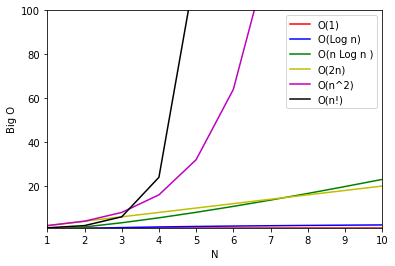

In [34]:
plt.plot(n, O1, 'r-', label = "O(1)")
plt.plot(n, OLogN, 'b-', label = "O(Log n)")
plt.plot(n, OnLogN, 'g-', label = "O(n Log n )")
plt.plot(n, On2, 'y-', label = "O(2n)")
plt.plot(n, O2n, 'm-', label = "O(n^2)")
plt.plot(n, OnF, 'k-', label = "O(n!)")
plt.xlim(1, 10)
plt.ylim(1, 100)
plt.xlabel('N')
plt.ylabel('Big O')
plt.legend()
plt.show()

Text(0.2, 0.05, '\nMaybe a description here\n')

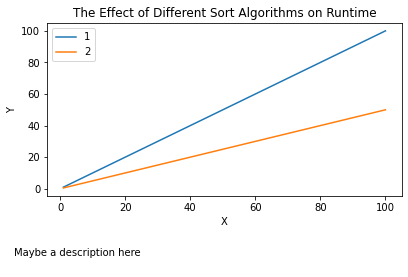

In [40]:
# x-axis: # of elements in list
x1 = range(1, 101) 
x2 = range(1, 101) 
# y-axis: time
y1 = range(1, 101) 
y2 = [i * 0.5 for i in range(1, 101)]

# adjust the area around the plot
plt.subplots_adjust(left = .13, right = .95, top = .9, bottom = .3)
# Plot the data
plt.plot(x1, y1)
plt.plot(x2, y2)

# Add a legend
plt.legend(['1', '2'], loc = "upper left", prop = {"size":10})
# y label
plt.ylabel("Y")
# x label
plt.xlabel("X")
# plot title
plt.title("The Effect of Different Sort Algorithms on Runtime")
# plot description
txt = """
Maybe a description here
"""
plt.figtext(.2, .05, txt, fontsize = 10, ha = "center")

# Save plot
# plt.savefig('/Users/ysui/Desktop/PhD/MTE/pythoncamp2023_prep/Day08/Lecture/plot.pdf')

In [ ]:
# Copyright of the original version:

# Copyright (c) 2014 Matt Dickenson
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.